Note: this analysis is for 13/50-1 (13/72-73 -- after expanding to 0.3 nm)

TODO: requires 20 GB memory, make it more memory efficient?

## Get states for each work trajectory for A39D

In [1]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [13]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [14]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [15]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['CA', 'CB', 'CG', 'OD2']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [16]:
indices_old

[628, 629, 632, 637]

In [17]:
indices_new

[629, 632, 637, 639]

In [18]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:56<00:00,  1.76it/s]

new files found: 100


#### Get dihedrals for complex

In [19]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [20]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [21]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['CA', 'CB', 'CG', 'OD2']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [22]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (CH3) of chain 0 residue 0 (ACE)>
<Atom 1 (C) of chain 0 residue 0 (ACE)>
<Atom 2 (O) of chain 0 residue 0 (ACE)>
<Atom 3 (H1) of chain 0 residue 0 (ACE)>
<Atom 4 (H2) of chain 0 residue 0 (ACE)>
<Atom 5 (H3) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (LYS)>
<Atom 7 (CA) of chain 0 residue 1 (LYS)>
<Atom 8 (C) of chain 0 residue 1 (LYS)>
<Atom 9 (O) of chain 0 residue 1 (LYS)>
<Atom 10 (CB) of chain 0 residue 1 (LYS)>
<Atom 11 (CG) of chain 0 residue 1 (LYS)>
<Atom 12 (CD) of chain 0 residue 1 (LYS)>
<Atom 13 (CE) of chain 0 residue 1 (LYS)>
<Atom 14 (NZ) of chain 0 residue 1 (LYS)>
<Atom 15 (H2) of chain 0 residue 1 (LYS)>
<Atom 16 (HA) of chain 0 residue 1 (LYS)>
<Atom 17 (HB3) of chain 0 residue 1 (LYS)>
<Atom 18 (HB2) of chain 0 residue 1 (LYS)>
<Atom 19 (HG2) of chain 0 residue 1 (LYS)>
<Atom 20 (HG3) of chain 0 residue 1 (LYS)>
<Atom 21 (HD2) of chain 0 residue 1 (LYS)>
<Atom 22 (HD3) of chain 0 residue 1 (LYS)>
<Atom 23 (HE3) of chain 0 residue 1 (LYS)>

<Atom 3143 (HH12) of chain 2 residue 200 (ARG)>
<Atom 3144 (HH11) of chain 2 residue 200 (ARG)>
<Atom 3145 (HH21) of chain 2 residue 200 (ARG)>
<Atom 3146 (HH22) of chain 2 residue 200 (ARG)>
<Atom 3147 (N) of chain 2 residue 201 (NME)>
<Atom 3148 (C) of chain 2 residue 201 (NME)>
<Atom 3149 (H) of chain 2 residue 201 (NME)>
<Atom 3150 (H1) of chain 2 residue 201 (NME)>
<Atom 3151 (H2) of chain 2 residue 201 (NME)>
<Atom 3152 (H3) of chain 2 residue 201 (NME)>
<Atom 3153 (O) of chain 3 residue 202 (HOH)>
<Atom 3154 (H1) of chain 3 residue 202 (HOH)>
<Atom 3155 (H2) of chain 3 residue 202 (HOH)>
<Atom 3156 (O) of chain 3 residue 203 (HOH)>
<Atom 3157 (H1) of chain 3 residue 203 (HOH)>
<Atom 3158 (H2) of chain 3 residue 203 (HOH)>
<Atom 3159 (O) of chain 3 residue 204 (HOH)>
<Atom 3160 (H1) of chain 3 residue 204 (HOH)>
<Atom 3161 (H2) of chain 3 residue 204 (HOH)>
<Atom 3162 (O) of chain 3 residue 205 (HOH)>
<Atom 3163 (H1) of chain 3 residue 205 (HOH)>
<Atom 3164 (H2) of chain 3 residu

<Atom 7142 (H2) of chain 4 residue 1531 (HOH)>
<Atom 7143 (O) of chain 4 residue 1532 (HOH)>
<Atom 7144 (H1) of chain 4 residue 1532 (HOH)>
<Atom 7145 (H2) of chain 4 residue 1532 (HOH)>
<Atom 7146 (O) of chain 4 residue 1533 (HOH)>
<Atom 7147 (H1) of chain 4 residue 1533 (HOH)>
<Atom 7148 (H2) of chain 4 residue 1533 (HOH)>
<Atom 7149 (O) of chain 4 residue 1534 (HOH)>
<Atom 7150 (H1) of chain 4 residue 1534 (HOH)>
<Atom 7151 (H2) of chain 4 residue 1534 (HOH)>
<Atom 7152 (O) of chain 4 residue 1535 (HOH)>
<Atom 7153 (H1) of chain 4 residue 1535 (HOH)>
<Atom 7154 (H2) of chain 4 residue 1535 (HOH)>
<Atom 7155 (O) of chain 4 residue 1536 (HOH)>
<Atom 7156 (H1) of chain 4 residue 1536 (HOH)>
<Atom 7157 (H2) of chain 4 residue 1536 (HOH)>
<Atom 7158 (O) of chain 4 residue 1537 (HOH)>
<Atom 7159 (H1) of chain 4 residue 1537 (HOH)>
<Atom 7160 (H2) of chain 4 residue 1537 (HOH)>
<Atom 7161 (O) of chain 4 residue 1538 (HOH)>
<Atom 7162 (H1) of chain 4 residue 1538 (HOH)>
<Atom 7163 (H2) of c

<Atom 11642 (H2) of chain 4 residue 3031 (HOH)>
<Atom 11643 (O) of chain 4 residue 3032 (HOH)>
<Atom 11644 (H1) of chain 4 residue 3032 (HOH)>
<Atom 11645 (H2) of chain 4 residue 3032 (HOH)>
<Atom 11646 (O) of chain 4 residue 3033 (HOH)>
<Atom 11647 (H1) of chain 4 residue 3033 (HOH)>
<Atom 11648 (H2) of chain 4 residue 3033 (HOH)>
<Atom 11649 (O) of chain 4 residue 3034 (HOH)>
<Atom 11650 (H1) of chain 4 residue 3034 (HOH)>
<Atom 11651 (H2) of chain 4 residue 3034 (HOH)>
<Atom 11652 (O) of chain 4 residue 3035 (HOH)>
<Atom 11653 (H1) of chain 4 residue 3035 (HOH)>
<Atom 11654 (H2) of chain 4 residue 3035 (HOH)>
<Atom 11655 (O) of chain 4 residue 3036 (HOH)>
<Atom 11656 (H1) of chain 4 residue 3036 (HOH)>
<Atom 11657 (H2) of chain 4 residue 3036 (HOH)>
<Atom 11658 (O) of chain 4 residue 3037 (HOH)>
<Atom 11659 (H1) of chain 4 residue 3037 (HOH)>
<Atom 11660 (H2) of chain 4 residue 3037 (HOH)>
<Atom 11661 (O) of chain 4 residue 3038 (HOH)>
<Atom 11662 (H1) of chain 4 residue 3038 (HOH)>

<Atom 16141 (H1) of chain 4 residue 4531 (HOH)>
<Atom 16142 (H2) of chain 4 residue 4531 (HOH)>
<Atom 16143 (O) of chain 4 residue 4532 (HOH)>
<Atom 16144 (H1) of chain 4 residue 4532 (HOH)>
<Atom 16145 (H2) of chain 4 residue 4532 (HOH)>
<Atom 16146 (O) of chain 4 residue 4533 (HOH)>
<Atom 16147 (H1) of chain 4 residue 4533 (HOH)>
<Atom 16148 (H2) of chain 4 residue 4533 (HOH)>
<Atom 16149 (O) of chain 4 residue 4534 (HOH)>
<Atom 16150 (H1) of chain 4 residue 4534 (HOH)>
<Atom 16151 (H2) of chain 4 residue 4534 (HOH)>
<Atom 16152 (O) of chain 4 residue 4535 (HOH)>
<Atom 16153 (H1) of chain 4 residue 4535 (HOH)>
<Atom 16154 (H2) of chain 4 residue 4535 (HOH)>
<Atom 16155 (O) of chain 4 residue 4536 (HOH)>
<Atom 16156 (H1) of chain 4 residue 4536 (HOH)>
<Atom 16157 (H2) of chain 4 residue 4536 (HOH)>
<Atom 16158 (O) of chain 4 residue 4537 (HOH)>
<Atom 16159 (H1) of chain 4 residue 4537 (HOH)>
<Atom 16160 (H2) of chain 4 residue 4537 (HOH)>
<Atom 16161 (O) of chain 4 residue 4538 (HOH)>

<Atom 20641 (H1) of chain 4 residue 6031 (HOH)>
<Atom 20642 (H2) of chain 4 residue 6031 (HOH)>
<Atom 20643 (O) of chain 4 residue 6032 (HOH)>
<Atom 20644 (H1) of chain 4 residue 6032 (HOH)>
<Atom 20645 (H2) of chain 4 residue 6032 (HOH)>
<Atom 20646 (O) of chain 4 residue 6033 (HOH)>
<Atom 20647 (H1) of chain 4 residue 6033 (HOH)>
<Atom 20648 (H2) of chain 4 residue 6033 (HOH)>
<Atom 20649 (O) of chain 4 residue 6034 (HOH)>
<Atom 20650 (H1) of chain 4 residue 6034 (HOH)>
<Atom 20651 (H2) of chain 4 residue 6034 (HOH)>
<Atom 20652 (O) of chain 4 residue 6035 (HOH)>
<Atom 20653 (H1) of chain 4 residue 6035 (HOH)>
<Atom 20654 (H2) of chain 4 residue 6035 (HOH)>
<Atom 20655 (O) of chain 4 residue 6036 (HOH)>
<Atom 20656 (H1) of chain 4 residue 6036 (HOH)>
<Atom 20657 (H2) of chain 4 residue 6036 (HOH)>
<Atom 20658 (O) of chain 4 residue 6037 (HOH)>
<Atom 20659 (H1) of chain 4 residue 6037 (HOH)>
<Atom 20660 (H2) of chain 4 residue 6037 (HOH)>
<Atom 20661 (O) of chain 4 residue 6038 (HOH)>

<Atom 25140 (O) of chain 4 residue 7531 (HOH)>
<Atom 25141 (H1) of chain 4 residue 7531 (HOH)>
<Atom 25142 (H2) of chain 4 residue 7531 (HOH)>
<Atom 25143 (O) of chain 4 residue 7532 (HOH)>
<Atom 25144 (H1) of chain 4 residue 7532 (HOH)>
<Atom 25145 (H2) of chain 4 residue 7532 (HOH)>
<Atom 25146 (O) of chain 4 residue 7533 (HOH)>
<Atom 25147 (H1) of chain 4 residue 7533 (HOH)>
<Atom 25148 (H2) of chain 4 residue 7533 (HOH)>
<Atom 25149 (O) of chain 4 residue 7534 (HOH)>
<Atom 25150 (H1) of chain 4 residue 7534 (HOH)>
<Atom 25151 (H2) of chain 4 residue 7534 (HOH)>
<Atom 25152 (O) of chain 4 residue 7535 (HOH)>
<Atom 25153 (H1) of chain 4 residue 7535 (HOH)>
<Atom 25154 (H2) of chain 4 residue 7535 (HOH)>
<Atom 25155 (O) of chain 4 residue 7536 (HOH)>
<Atom 25156 (H1) of chain 4 residue 7536 (HOH)>
<Atom 25157 (H2) of chain 4 residue 7536 (HOH)>
<Atom 25158 (O) of chain 4 residue 7537 (HOH)>
<Atom 25159 (H1) of chain 4 residue 7537 (HOH)>
<Atom 25160 (H2) of chain 4 residue 7537 (HOH)>

In [23]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


new files found: 100


In [24]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [25]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [26]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

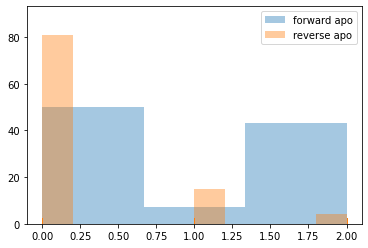

In [27]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

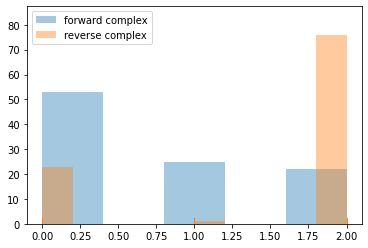

In [28]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on A39D

In [29]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [30]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [31]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["A42T"]
d_results = {}
d_phases = {}
first = 73
for i in tqdm_notebook([73]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 73
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

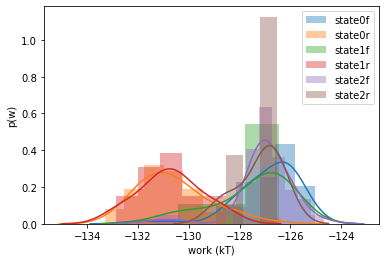

In [32]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [0,1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

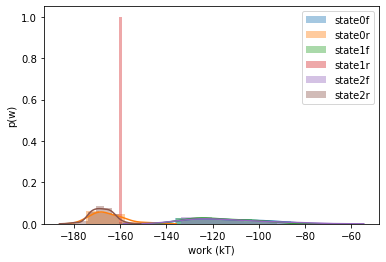

In [33]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [34]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [35]:
import tqdm
states_apo = [0, 1, 2]
states_complex = [0, 1, 2]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [02:07<00:00, 78.63it/s]


In [36]:
dgs_state_all_A42T = dgs_state_all

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

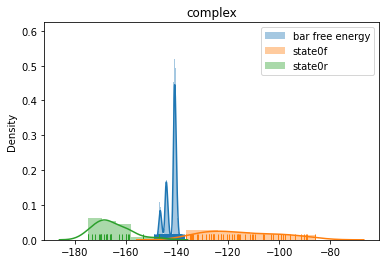

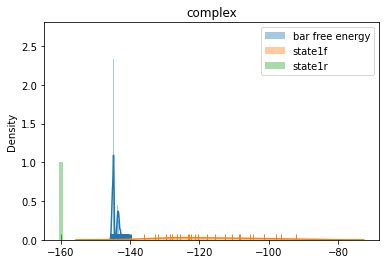

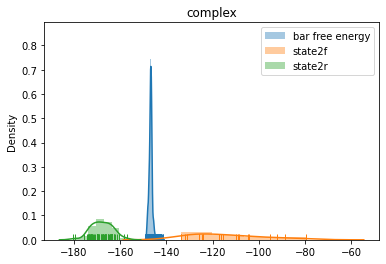

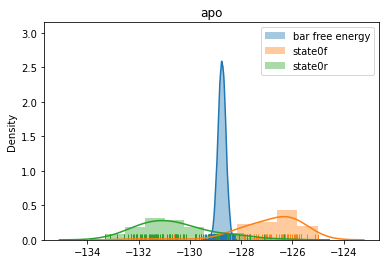

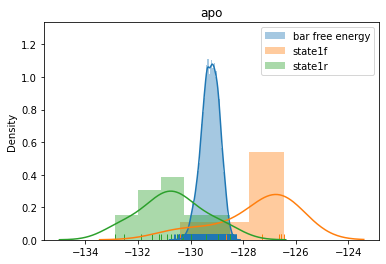

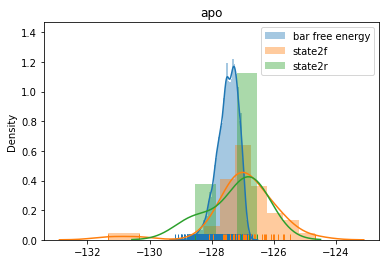

In [37]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

## Get states for each work trajectory for D39A

In [38]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [40]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [41]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/72/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [42]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [43]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'],  ['CA', 'CB', 'CG', 'OD2']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [44]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:58<00:00,  1.70it/s]

new files found: 100


#### Get dihedrals for complex

In [45]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/72/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [46]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [47]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'],  ['CA', 'CB', 'CG', 'OD2']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [48]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


new files found: 100


In [49]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [50]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [51]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

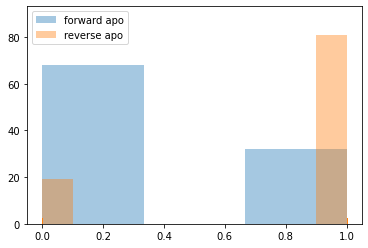

In [52]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

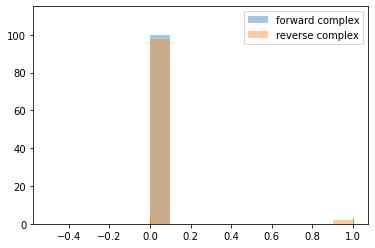

In [53]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

In [54]:
for atom in htf.hybrid_topology.atoms:
    print(atom, atom.index)

ACE0-CH3 0
ACE0-C 1
ACE0-O 2
ACE0-H1 3
ACE0-H2 4
ACE0-H3 5
LYS1-N 6
LYS1-CA 7
LYS1-C 8
LYS1-O 9
LYS1-CB 10
LYS1-CG 11
LYS1-CD 12
LYS1-CE 13
LYS1-NZ 14
LYS1-H2 15
LYS1-HA 16
LYS1-HB3 17
LYS1-HB2 18
LYS1-HG2 19
LYS1-HG3 20
LYS1-HD2 21
LYS1-HD3 22
LYS1-HE3 23
LYS1-HE2 24
LYS1-HZ1 25
LYS1-HZ2 26
LYS1-HZ3 27
LYS2-N 28
LYS2-CA 29
LYS2-C 30
LYS2-O 31
LYS2-CB 32
LYS2-CG 33
LYS2-CD 34
LYS2-CE 35
LYS2-NZ 36
LYS2-H 37
LYS2-HA 38
LYS2-HB3 39
LYS2-HB2 40
LYS2-HG2 41
LYS2-HG3 42
LYS2-HD3 43
LYS2-HD2 44
LYS2-HE3 45
LYS2-HE2 46
LYS2-HZ1 47
LYS2-HZ2 48
LYS2-HZ3 49
ALA3-N 50
ALA3-CA 51
ALA3-C 52
ALA3-O 53
ALA3-CB 54
ALA3-H 55
ALA3-HA 56
ALA3-HB1 57
ALA3-HB2 58
ALA3-HB3 59
VAL4-N 60
VAL4-CA 61
VAL4-C 62
VAL4-O 63
VAL4-CB 64
VAL4-CG1 65
VAL4-CG2 66
VAL4-H 67
VAL4-HA 68
VAL4-HB 69
VAL4-HG11 70
VAL4-HG12 71
VAL4-HG13 72
VAL4-HG21 73
VAL4-HG22 74
VAL4-HG23 75
ILE5-N 76
ILE5-CA 77
ILE5-C 78
ILE5-O 79
ILE5-CB 80
ILE5-CG1 81
ILE5-CG2 82
ILE5-CD1 83
ILE5-H 84
ILE5-HA 85
ILE5-HB 86
ILE5-HG13 87
ILE5-HG12 88
ILE5-

VAL10-N 1552
VAL10-CA 1553
VAL10-C 1554
VAL10-O 1555
VAL10-CB 1556
VAL10-CG1 1557
VAL10-CG2 1558
VAL10-H 1559
VAL10-HA 1560
VAL10-HB 1561
VAL10-HG11 1562
VAL10-HG12 1563
VAL10-HG13 1564
VAL10-HG21 1565
VAL10-HG22 1566
VAL10-HG23 1567
ALA11-N 1568
ALA11-CA 1569
ALA11-C 1570
ALA11-O 1571
ALA11-CB 1572
ALA11-H 1573
ALA11-HA 1574
ALA11-HB1 1575
ALA11-HB2 1576
ALA11-HB3 1577
ASP12-N 1578
ASP12-CA 1579
ASP12-C 1580
ASP12-O 1581
ASP12-CB 1582
ASP12-CG 1583
ASP12-OD1 1584
ASP12-OD2 1585
ASP12-H 1586
ASP12-HA 1587
ASP12-HB3 1588
ASP12-HB2 1589
TYR13-N 1590
TYR13-CA 1591
TYR13-C 1592
TYR13-O 1593
TYR13-CB 1594
TYR13-CG 1595
TYR13-CD1 1596
TYR13-CD2 1597
TYR13-CE1 1598
TYR13-CE2 1599
TYR13-CZ 1600
TYR13-OH 1601
TYR13-H 1602
TYR13-HA 1603
TYR13-HB3 1604
TYR13-HB2 1605
TYR13-HD1 1606
TYR13-HD2 1607
TYR13-HE1 1608
TYR13-HE2 1609
TYR13-HH 1610
LEU14-N 1611
LEU14-CA 1612
LEU14-C 1613
LEU14-O 1614
LEU14-CB 1615
LEU14-CG 1616
LEU14-CD1 1617
LEU14-CD2 1618
LEU14-H 1619
LEU14-HA 1620
LEU14-HB3 1621
LEU14-

HOH252-H2 3302
HOH253-O 3303
HOH253-H1 3304
HOH253-H2 3305
HOH254-O 3306
HOH254-H1 3307
HOH254-H2 3308
HOH255-O 3309
HOH255-H1 3310
HOH255-H2 3311
HOH256-O 3312
HOH256-H1 3313
HOH256-H2 3314
HOH257-O 3315
HOH257-H1 3316
HOH257-H2 3317
HOH258-O 3318
HOH258-H1 3319
HOH258-H2 3320
HOH259-O 3321
HOH259-H1 3322
HOH259-H2 3323
HOH260-O 3324
HOH260-H1 3325
HOH260-H2 3326
HOH261-O 3327
HOH261-H1 3328
HOH261-H2 3329
HOH262-O 3330
HOH262-H1 3331
HOH262-H2 3332
HOH263-O 3333
HOH263-H1 3334
HOH263-H2 3335
HOH264-O 3336
HOH264-H1 3337
HOH264-H2 3338
HOH265-O 3339
HOH265-H1 3340
HOH265-H2 3341
HOH266-O 3342
HOH266-H1 3343
HOH266-H2 3344
HOH267-O 3345
HOH267-H1 3346
HOH267-H2 3347
HOH268-O 3348
HOH268-H1 3349
HOH268-H2 3350
HOH269-O 3351
HOH269-H1 3352
HOH269-H2 3353
HOH270-O 3354
HOH270-H1 3355
HOH270-H2 3356
HOH271-O 3357
HOH271-H1 3358
HOH271-H2 3359
HOH272-O 3360
HOH272-H1 3361
HOH272-H2 3362
HOH273-O 3363
HOH273-H1 3364
HOH273-H2 3365
HOH274-O 3366
HOH274-H1 3367
HOH274-H2 3368
HOH275-O 3369
HOH

HOH1004-H2 5552
HOH1005-O 5553
HOH1005-H1 5554
HOH1005-H2 5555
HOH1006-O 5556
HOH1006-H1 5557
HOH1006-H2 5558
HOH1007-O 5559
HOH1007-H1 5560
HOH1007-H2 5561
HOH1008-O 5562
HOH1008-H1 5563
HOH1008-H2 5564
HOH1009-O 5565
HOH1009-H1 5566
HOH1009-H2 5567
HOH1010-O 5568
HOH1010-H1 5569
HOH1010-H2 5570
HOH1011-O 5571
HOH1011-H1 5572
HOH1011-H2 5573
HOH1012-O 5574
HOH1012-H1 5575
HOH1012-H2 5576
HOH1013-O 5577
HOH1013-H1 5578
HOH1013-H2 5579
HOH1014-O 5580
HOH1014-H1 5581
HOH1014-H2 5582
HOH1015-O 5583
HOH1015-H1 5584
HOH1015-H2 5585
HOH1016-O 5586
HOH1016-H1 5587
HOH1016-H2 5588
HOH1017-O 5589
HOH1017-H1 5590
HOH1017-H2 5591
HOH1018-O 5592
HOH1018-H1 5593
HOH1018-H2 5594
HOH1019-O 5595
HOH1019-H1 5596
HOH1019-H2 5597
HOH1020-O 5598
HOH1020-H1 5599
HOH1020-H2 5600
HOH1021-O 5601
HOH1021-H1 5602
HOH1021-H2 5603
HOH1022-O 5604
HOH1022-H1 5605
HOH1022-H2 5606
HOH1023-O 5607
HOH1023-H1 5608
HOH1023-H2 5609
HOH1024-O 5610
HOH1024-H1 5611
HOH1024-H2 5612
HOH1025-O 5613
HOH1025-H1 5614
HOH1025-H2 56

HOH1756-H2 7802
HOH1757-O 7803
HOH1757-H1 7804
HOH1757-H2 7805
HOH1758-O 7806
HOH1758-H1 7807
HOH1758-H2 7808
HOH1759-O 7809
HOH1759-H1 7810
HOH1759-H2 7811
HOH1760-O 7812
HOH1760-H1 7813
HOH1760-H2 7814
HOH1761-O 7815
HOH1761-H1 7816
HOH1761-H2 7817
HOH1762-O 7818
HOH1762-H1 7819
HOH1762-H2 7820
HOH1763-O 7821
HOH1763-H1 7822
HOH1763-H2 7823
HOH1764-O 7824
HOH1764-H1 7825
HOH1764-H2 7826
HOH1765-O 7827
HOH1765-H1 7828
HOH1765-H2 7829
HOH1766-O 7830
HOH1766-H1 7831
HOH1766-H2 7832
HOH1767-O 7833
HOH1767-H1 7834
HOH1767-H2 7835
HOH1768-O 7836
HOH1768-H1 7837
HOH1768-H2 7838
HOH1769-O 7839
HOH1769-H1 7840
HOH1769-H2 7841
HOH1770-O 7842
HOH1770-H1 7843
HOH1770-H2 7844
HOH1771-O 7845
HOH1771-H1 7846
HOH1771-H2 7847
HOH1772-O 7848
HOH1772-H1 7849
HOH1772-H2 7850
HOH1773-O 7851
HOH1773-H1 7852
HOH1773-H2 7853
HOH1774-O 7854
HOH1774-H1 7855
HOH1774-H2 7856
HOH1775-O 7857
HOH1775-H1 7858
HOH1775-H2 7859
HOH1776-O 7860
HOH1776-H1 7861
HOH1776-H2 7862
HOH1777-O 7863
HOH1777-H1 7864
HOH1777-H2 78

HOH2509-H1 10051
HOH2509-H2 10052
HOH2510-O 10053
HOH2510-H1 10054
HOH2510-H2 10055
HOH2511-O 10056
HOH2511-H1 10057
HOH2511-H2 10058
HOH2512-O 10059
HOH2512-H1 10060
HOH2512-H2 10061
HOH2513-O 10062
HOH2513-H1 10063
HOH2513-H2 10064
HOH2514-O 10065
HOH2514-H1 10066
HOH2514-H2 10067
HOH2515-O 10068
HOH2515-H1 10069
HOH2515-H2 10070
HOH2516-O 10071
HOH2516-H1 10072
HOH2516-H2 10073
HOH2517-O 10074
HOH2517-H1 10075
HOH2517-H2 10076
HOH2518-O 10077
HOH2518-H1 10078
HOH2518-H2 10079
HOH2519-O 10080
HOH2519-H1 10081
HOH2519-H2 10082
HOH2520-O 10083
HOH2520-H1 10084
HOH2520-H2 10085
HOH2521-O 10086
HOH2521-H1 10087
HOH2521-H2 10088
HOH2522-O 10089
HOH2522-H1 10090
HOH2522-H2 10091
HOH2523-O 10092
HOH2523-H1 10093
HOH2523-H2 10094
HOH2524-O 10095
HOH2524-H1 10096
HOH2524-H2 10097
HOH2525-O 10098
HOH2525-H1 10099
HOH2525-H2 10100
HOH2526-O 10101
HOH2526-H1 10102
HOH2526-H2 10103
HOH2527-O 10104
HOH2527-H1 10105
HOH2527-H2 10106
HOH2528-O 10107
HOH2528-H1 10108
HOH2528-H2 10109
HOH2529-O 10110


HOH3260-H1 12301
HOH3260-H2 12302
HOH3261-O 12303
HOH3261-H1 12304
HOH3261-H2 12305
HOH3262-O 12306
HOH3262-H1 12307
HOH3262-H2 12308
HOH3263-O 12309
HOH3263-H1 12310
HOH3263-H2 12311
HOH3264-O 12312
HOH3264-H1 12313
HOH3264-H2 12314
HOH3265-O 12315
HOH3265-H1 12316
HOH3265-H2 12317
HOH3266-O 12318
HOH3266-H1 12319
HOH3266-H2 12320
HOH3267-O 12321
HOH3267-H1 12322
HOH3267-H2 12323
HOH3268-O 12324
HOH3268-H1 12325
HOH3268-H2 12326
HOH3269-O 12327
HOH3269-H1 12328
HOH3269-H2 12329
HOH3270-O 12330
HOH3270-H1 12331
HOH3270-H2 12332
HOH3271-O 12333
HOH3271-H1 12334
HOH3271-H2 12335
HOH3272-O 12336
HOH3272-H1 12337
HOH3272-H2 12338
HOH3273-O 12339
HOH3273-H1 12340
HOH3273-H2 12341
HOH3274-O 12342
HOH3274-H1 12343
HOH3274-H2 12344
HOH3275-O 12345
HOH3275-H1 12346
HOH3275-H2 12347
HOH3276-O 12348
HOH3276-H1 12349
HOH3276-H2 12350
HOH3277-O 12351
HOH3277-H1 12352
HOH3277-H2 12353
HOH3278-O 12354
HOH3278-H1 12355
HOH3278-H2 12356
HOH3279-O 12357
HOH3279-H1 12358
HOH3279-H2 12359
HOH3280-O 12360


HOH4012-H1 14551
HOH4012-H2 14552
HOH4013-O 14553
HOH4013-H1 14554
HOH4013-H2 14555
HOH4014-O 14556
HOH4014-H1 14557
HOH4014-H2 14558
HOH4015-O 14559
HOH4015-H1 14560
HOH4015-H2 14561
HOH4016-O 14562
HOH4016-H1 14563
HOH4016-H2 14564
HOH4017-O 14565
HOH4017-H1 14566
HOH4017-H2 14567
HOH4018-O 14568
HOH4018-H1 14569
HOH4018-H2 14570
HOH4019-O 14571
HOH4019-H1 14572
HOH4019-H2 14573
HOH4020-O 14574
HOH4020-H1 14575
HOH4020-H2 14576
HOH4021-O 14577
HOH4021-H1 14578
HOH4021-H2 14579
HOH4022-O 14580
HOH4022-H1 14581
HOH4022-H2 14582
HOH4023-O 14583
HOH4023-H1 14584
HOH4023-H2 14585
HOH4024-O 14586
HOH4024-H1 14587
HOH4024-H2 14588
HOH4025-O 14589
HOH4025-H1 14590
HOH4025-H2 14591
HOH4026-O 14592
HOH4026-H1 14593
HOH4026-H2 14594
HOH4027-O 14595
HOH4027-H1 14596
HOH4027-H2 14597
HOH4028-O 14598
HOH4028-H1 14599
HOH4028-H2 14600
HOH4029-O 14601
HOH4029-H1 14602
HOH4029-H2 14603
HOH4030-O 14604
HOH4030-H1 14605
HOH4030-H2 14606
HOH4031-O 14607
HOH4031-H1 14608
HOH4031-H2 14609
HOH4032-O 14610


HOH4764-H1 16801
HOH4764-H2 16802
HOH4765-O 16803
HOH4765-H1 16804
HOH4765-H2 16805
HOH4766-O 16806
HOH4766-H1 16807
HOH4766-H2 16808
HOH4767-O 16809
HOH4767-H1 16810
HOH4767-H2 16811
HOH4768-O 16812
HOH4768-H1 16813
HOH4768-H2 16814
HOH4769-O 16815
HOH4769-H1 16816
HOH4769-H2 16817
HOH4770-O 16818
HOH4770-H1 16819
HOH4770-H2 16820
HOH4771-O 16821
HOH4771-H1 16822
HOH4771-H2 16823
HOH4772-O 16824
HOH4772-H1 16825
HOH4772-H2 16826
HOH4773-O 16827
HOH4773-H1 16828
HOH4773-H2 16829
HOH4774-O 16830
HOH4774-H1 16831
HOH4774-H2 16832
HOH4775-O 16833
HOH4775-H1 16834
HOH4775-H2 16835
HOH4776-O 16836
HOH4776-H1 16837
HOH4776-H2 16838
HOH4777-O 16839
HOH4777-H1 16840
HOH4777-H2 16841
HOH4778-O 16842
HOH4778-H1 16843
HOH4778-H2 16844
HOH4779-O 16845
HOH4779-H1 16846
HOH4779-H2 16847
HOH4780-O 16848
HOH4780-H1 16849
HOH4780-H2 16850
HOH4781-O 16851
HOH4781-H1 16852
HOH4781-H2 16853
HOH4782-O 16854
HOH4782-H1 16855
HOH4782-H2 16856
HOH4783-O 16857
HOH4783-H1 16858
HOH4783-H2 16859
HOH4784-O 16860


HOH5514-O 19050
HOH5514-H1 19051
HOH5514-H2 19052
HOH5515-O 19053
HOH5515-H1 19054
HOH5515-H2 19055
HOH5516-O 19056
HOH5516-H1 19057
HOH5516-H2 19058
HOH5517-O 19059
HOH5517-H1 19060
HOH5517-H2 19061
HOH5518-O 19062
HOH5518-H1 19063
HOH5518-H2 19064
HOH5519-O 19065
HOH5519-H1 19066
HOH5519-H2 19067
HOH5520-O 19068
HOH5520-H1 19069
HOH5520-H2 19070
HOH5521-O 19071
HOH5521-H1 19072
HOH5521-H2 19073
HOH5522-O 19074
HOH5522-H1 19075
HOH5522-H2 19076
HOH5523-O 19077
HOH5523-H1 19078
HOH5523-H2 19079
HOH5524-O 19080
HOH5524-H1 19081
HOH5524-H2 19082
HOH5525-O 19083
HOH5525-H1 19084
HOH5525-H2 19085
HOH5526-O 19086
HOH5526-H1 19087
HOH5526-H2 19088
HOH5527-O 19089
HOH5527-H1 19090
HOH5527-H2 19091
HOH5528-O 19092
HOH5528-H1 19093
HOH5528-H2 19094
HOH5529-O 19095
HOH5529-H1 19096
HOH5529-H2 19097
HOH5530-O 19098
HOH5530-H1 19099
HOH5530-H2 19100
HOH5531-O 19101
HOH5531-H1 19102
HOH5531-H2 19103
HOH5532-O 19104
HOH5532-H1 19105
HOH5532-H2 19106
HOH5533-O 19107
HOH5533-H1 19108
HOH5533-H2 19109


HOH6266-O 21300
HOH6266-H1 21301
HOH6266-H2 21302
HOH6267-O 21303
HOH6267-H1 21304
HOH6267-H2 21305
HOH6268-O 21306
HOH6268-H1 21307
HOH6268-H2 21308
HOH6269-O 21309
HOH6269-H1 21310
HOH6269-H2 21311
HOH6270-O 21312
HOH6270-H1 21313
HOH6270-H2 21314
HOH6271-O 21315
HOH6271-H1 21316
HOH6271-H2 21317
HOH6272-O 21318
HOH6272-H1 21319
HOH6272-H2 21320
HOH6273-O 21321
HOH6273-H1 21322
HOH6273-H2 21323
HOH6274-O 21324
HOH6274-H1 21325
HOH6274-H2 21326
HOH6275-O 21327
HOH6275-H1 21328
HOH6275-H2 21329
HOH6276-O 21330
HOH6276-H1 21331
HOH6276-H2 21332
HOH6277-O 21333
HOH6277-H1 21334
HOH6277-H2 21335
HOH6278-O 21336
HOH6278-H1 21337
HOH6278-H2 21338
HOH6279-O 21339
HOH6279-H1 21340
HOH6279-H2 21341
HOH6280-O 21342
HOH6280-H1 21343
HOH6280-H2 21344
HOH6281-O 21345
HOH6281-H1 21346
HOH6281-H2 21347
HOH6282-O 21348
HOH6282-H1 21349
HOH6282-H2 21350
HOH6283-O 21351
HOH6283-H1 21352
HOH6283-H2 21353
HOH6284-O 21354
HOH6284-H1 21355
HOH6284-H2 21356
HOH6285-O 21357
HOH6285-H1 21358
HOH6285-H2 21359


HOH7017-O 23550
HOH7017-H1 23551
HOH7017-H2 23552
HOH7018-O 23553
HOH7018-H1 23554
HOH7018-H2 23555
HOH7019-O 23556
HOH7019-H1 23557
HOH7019-H2 23558
HOH7020-O 23559
HOH7020-H1 23560
HOH7020-H2 23561
HOH7021-O 23562
HOH7021-H1 23563
HOH7021-H2 23564
HOH7022-O 23565
HOH7022-H1 23566
HOH7022-H2 23567
HOH7023-O 23568
HOH7023-H1 23569
HOH7023-H2 23570
HOH7024-O 23571
HOH7024-H1 23572
HOH7024-H2 23573
HOH7025-O 23574
HOH7025-H1 23575
HOH7025-H2 23576
HOH7026-O 23577
HOH7026-H1 23578
HOH7026-H2 23579
HOH7027-O 23580
HOH7027-H1 23581
HOH7027-H2 23582
HOH7028-O 23583
HOH7028-H1 23584
HOH7028-H2 23585
HOH7029-O 23586
HOH7029-H1 23587
HOH7029-H2 23588
HOH7030-O 23589
HOH7030-H1 23590
HOH7030-H2 23591
HOH7031-O 23592
HOH7031-H1 23593
HOH7031-H2 23594
HOH7032-O 23595
HOH7032-H1 23596
HOH7032-H2 23597
HOH7033-O 23598
HOH7033-H1 23599
HOH7033-H2 23600
HOH7034-O 23601
HOH7034-H1 23602
HOH7034-H2 23603
HOH7035-O 23604
HOH7035-H1 23605
HOH7035-H2 23606
HOH7036-O 23607
HOH7036-H1 23608
HOH7036-H2 23609


HOH7769-O 25800
HOH7769-H1 25801
HOH7769-H2 25802
HOH7770-O 25803
HOH7770-H1 25804
HOH7770-H2 25805
HOH7771-O 25806
HOH7771-H1 25807
HOH7771-H2 25808
HOH7772-O 25809
HOH7772-H1 25810
HOH7772-H2 25811
HOH7773-O 25812
HOH7773-H1 25813
HOH7773-H2 25814
HOH7774-O 25815
HOH7774-H1 25816
HOH7774-H2 25817
HOH7775-O 25818
HOH7775-H1 25819
HOH7775-H2 25820
HOH7776-O 25821
HOH7776-H1 25822
HOH7776-H2 25823
HOH7777-O 25824
HOH7777-H1 25825
HOH7777-H2 25826
HOH7778-O 25827
HOH7778-H1 25828
HOH7778-H2 25829
HOH7779-O 25830
HOH7779-H1 25831
HOH7779-H2 25832
HOH7780-O 25833
HOH7780-H1 25834
HOH7780-H2 25835
HOH7781-O 25836
HOH7781-H1 25837
HOH7781-H2 25838
HOH7782-O 25839
HOH7782-H1 25840
HOH7782-H2 25841
HOH7783-O 25842
HOH7783-H1 25843
HOH7783-H2 25844
HOH7784-O 25845
HOH7784-H1 25846
HOH7784-H2 25847
HOH7785-O 25848
HOH7785-H1 25849
HOH7785-H2 25850
HOH7786-O 25851
HOH7786-H1 25852
HOH7786-H2 25853
HOH7787-O 25854
HOH7787-H1 25855
HOH7787-H2 25856
HOH7788-O 25857
HOH7788-H1 25858
HOH7788-H2 25859


HOH8519-H2 28049
HOH8520-O 28050
HOH8520-H1 28051
HOH8520-H2 28052
HOH8521-O 28053
HOH8521-H1 28054
HOH8521-H2 28055
HOH8522-O 28056
HOH8522-H1 28057
HOH8522-H2 28058
HOH8523-O 28059
HOH8523-H1 28060
HOH8523-H2 28061
HOH8524-O 28062
HOH8524-H1 28063
HOH8524-H2 28064
HOH8525-O 28065
HOH8525-H1 28066
HOH8525-H2 28067
HOH8526-O 28068
HOH8526-H1 28069
HOH8526-H2 28070
HOH8527-O 28071
HOH8527-H1 28072
HOH8527-H2 28073
HOH8528-O 28074
HOH8528-H1 28075
HOH8528-H2 28076
HOH8529-O 28077
HOH8529-H1 28078
HOH8529-H2 28079
HOH8530-O 28080
HOH8530-H1 28081
HOH8530-H2 28082
HOH8531-O 28083
HOH8531-H1 28084
HOH8531-H2 28085
HOH8532-O 28086
HOH8532-H1 28087
HOH8532-H2 28088
HOH8533-O 28089
HOH8533-H1 28090
HOH8533-H2 28091
HOH8534-O 28092
HOH8534-H1 28093
HOH8534-H2 28094
HOH8535-O 28095
HOH8535-H1 28096
HOH8535-H2 28097
HOH8536-O 28098
HOH8536-H1 28099
HOH8536-H2 28100
HOH8537-O 28101
HOH8537-H1 28102
HOH8537-H2 28103
HOH8538-O 28104
HOH8538-H1 28105
HOH8538-H2 28106
HOH8539-O 28107
HOH8539-H1 28108


## Run estimator on D39A

In [55]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [56]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [57]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 72
for i in tqdm_notebook([72]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 72
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

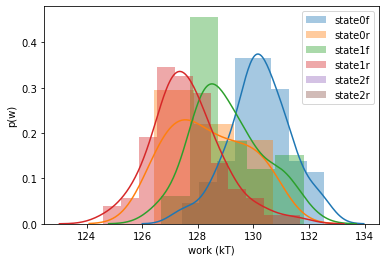

In [58]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [0, 1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

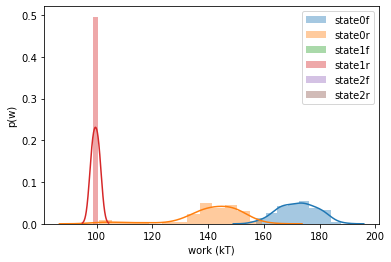

In [59]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [60]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(energy) # Change to exp(-energy*-1)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['apo'] - d_dgs_phase['complex']

In [71]:
import tqdm
states_apo = [0, 1]
states_complex = [0]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:19<00:00, 125.46it/s]


In [72]:
dgs_state_all_T42A = dgs_state_all

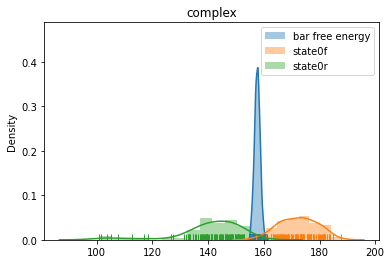

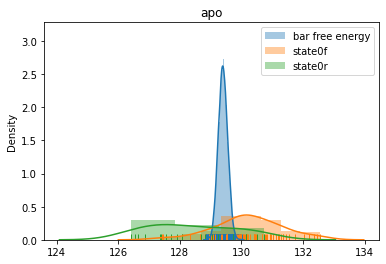

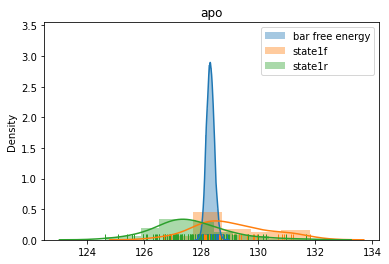

In [73]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

### Compare states A39D vs D39A

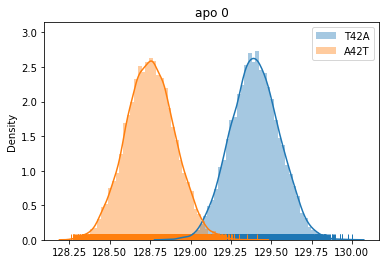

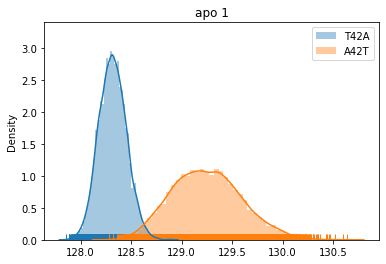

In [75]:
states = [0, 1]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

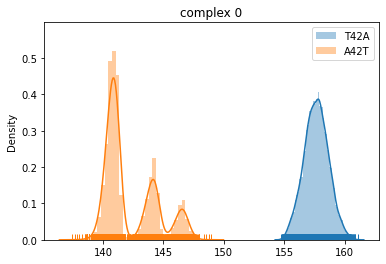

In [76]:
states = [0]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

## Extract traj

### D39A complex reverse traj with work close to 160

In [1]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [21]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/72/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.npy"), "rb") as f:
    pos_reverse_old = np.load(f)
    

In [3]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [14]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [15]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [16]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [22]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.old_topology, pos_reverse_old[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [23]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [24]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [25]:
traj = md.Trajectory(pos_reverse_old, md.Topology.from_openmm(htf._topology_proposal.old_topology))

In [26]:
traj

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, without unitcells at 0x2b65e9ee88d0>

In [27]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [28]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29474 atoms, 8989 residues, and unitcells at 0x2b65e9d78f50>

In [30]:
traj.save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_62_reverse_neq_old.pdb"))

### A39D complex forward traj with work close to 140

In [39]:
import mdtraj as md
import pickle
import os
import numpy as np
from simtk import unit

In [40]:
# Get positions from eq positions of each cycle (positions are solute only)

outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/73/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir)) 
with open(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.npy"), "rb") as f:
    pos_forward_new = np.load(f)
    

In [41]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [42]:
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])

In [43]:
htf._topology_proposal.old_topology.setPeriodicBoxVectors(box_vectors)

In [44]:
htf._topology_proposal.old_topology.getPeriodicBoxVectors()

Quantity(value=array([[6.7997, 0.    , 0.    ],
       [0.    , 6.7997, 0.    ],
       [0.    , 0.    , 6.7997]]), unit=nanometer)

In [45]:
# Write PDB file using openmm bc it will include box vectors
from simtk.openmm import app
app.PDBFile.writeFile(htf._topology_proposal.new_topology, pos_forward_new[0], open(os.path.join(outdir, "test.pdb"), 'w'))

In [46]:
# Load pdb into mdtraj
pdb = md.load(os.path.join(outdir, "test.pdb"))

In [47]:
pdb.unitcell_vectors

array([[[6.7997, 0.    , 0.    ],
        [0.    , 6.7997, 0.    ],
        [0.    , 0.    , 6.7997]]], dtype=float32)

In [48]:
traj = md.Trajectory(pos_forward_new, md.Topology.from_openmm(htf._topology_proposal.new_topology))

In [49]:
traj

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, without unitcells at 0x2b6652b8b8d0>

In [50]:
# Set unit cell vectors in traj based on pdb vectors
traj.unitcell_vectors = np.repeat(pdb.unitcell_vectors, 100, axis=0)

In [51]:
traj.image_molecules()

<mdtraj.Trajectory with 100 frames, 29476 atoms, 8989 residues, and unitcells at 0x2b65fc8ed150>

In [52]:
traj.save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_80_forward_neq_new.pdb"))

# Grab indices of trajs in D39A complex reverse with works close to -160

In [2]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [3]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [4]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 72
for i in tqdm_notebook([72]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 72
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [5]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [11]:
for i, work in enumerate(reverse_complex_accumulated):
    if abs(work) < 165 and abs(work) > 155:
        print(i, work)

48 -157.6725672722674
62 -159.49688095337464
72 -155.455073281715


# Grab indices of trajs in A39D complex forward with works far from -160

In [31]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib:(private) matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.3.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases'

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [32]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [33]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 73
for i in tqdm_notebook([73]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 73
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

In [34]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    

In [38]:
for i, work in enumerate(forward_complex_accumulated):
    if abs(work) > 130:
        print(i, work)

11 -131.0036411382579
17 -133.59138746807292
33 -135.019367829651
36 -132.9313754151517
39 -134.07096241966784
40 -130.1146226969148
47 -134.48549176583415
48 -133.70815831053218
53 -131.8473938485725
79 -136.03946090010166
80 -136.47387534891928
82 -132.0389176488211
84 -131.93493631181718
91 -133.6036721861534
92 -132.05519750766948
